# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
dataDir = "E:/AV/DataSetExploration/drone-dataset-tools/data/location-2/home"
# dataDir = "D:/AV/DataSetExploration/drone-dataset-tools/data/location-2/lab"

In [2]:
exec(open('init_notebook.py').read())

current working dirE:\AV\DataSetExploration\TTI-dataset-tools\src


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from tti_dataset_tools.TrajectoryTransformer import TrajectoryTransformer
from tti_dataset_tools.TrajectoryVisualizer import TrajectoryVisualizer
from tti_dataset_tools.TrajectoryCleaner import TrajectoryCleaner
from tti_dataset_tools.ColMapper import ColMapper

In [5]:
sceneId = 10
date = "2022-12-09"
fps=5
minYDisplacement = 5
maxXDisplacement = 6
pedDf = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-pedestrians.csv"))
otherDf = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-others.csv"))
tracksMeta = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-meta.csv"))

In [6]:
visualizer = TrajectoryVisualizer()
colMapper = ColMapper(
        idCol='uniqueTrackId', 
        xCol='sceneX', 
        yCol='sceneY',
        xVelCol='sceneXVelocity', 
        yVelCol='sceneYVelocity', 
        speedCol='speed'
    )
transformer = TrajectoryTransformer(colMapper)
cleaner = TrajectoryCleaner(
    colMapper = colMapper,
    minSpeed = 0.0, # we can consider them as obstacles
    maxSpeed = 3.5,
    minYDisplacement = minYDisplacement,
    maxXDisplacement = maxXDisplacement
)

In [7]:
pedDf.head()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration
0,18,751,18023,10,5.0,0.633506,2.406819,-0.124725,1.197404,-0.200707,-0.049552
1,18,756,18023,10,5.0,0.653314,2.163065,-0.099043,1.218770,-0.128407,-0.106831
2,18,761,18023,10,5.0,0.674600,1.919279,-0.106426,1.218930,0.036911,-0.000799
3,18,766,18023,10,5.0,0.701232,1.674626,-0.133163,1.223264,0.133686,-0.021670
4,18,771,18023,10,5.0,0.728331,1.426538,-0.135494,1.240441,0.011656,-0.085887


In [8]:
# print(pedDf["uniqueTrackId"].unique())

In [9]:
transformer.deriveSpeed(pedDf)
transformer.deriveDisplacements(pedDf)
pedDf.describe()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY
count,11586.000000,11586.000000,11586.000000,11586.0,11586.0,11586.000000,11586.000000,11586.000000,11586.000000,11586.000000,11586.000000,11586.000000,11586.000000,11586.000000
mean,23.849128,14855.134818,24113.670292,10.0,5.0,0.336048,0.336094,-0.061277,0.165184,-0.007893,-0.003349,1.485556,0.889903,2.669411
std,3.366804,8969.704353,3391.888963,0.0,0.0,1.644876,2.954944,0.458765,1.449799,0.344297,0.276520,0.369268,1.414959,2.427673
min,18.000000,10.000000,18023.000000,10.0,5.0,-16.717616,-3.061491,-2.758886,-3.999647,-2.880817,-3.141258,0.005706,0.000000,0.000000
25%,21.000000,7550.000000,21170.000000,10.0,5.0,-0.132228,-1.319753,-0.394843,-1.333720,-0.178302,-0.124907,1.286771,0.283532,1.108517
50%,24.000000,14514.500000,24186.000000,10.0,5.0,0.485618,0.050556,-0.110367,1.083358,-0.003240,-0.000636,1.468881,0.606831,2.457380
75%,27.000000,22712.750000,27193.000000,10.0,5.0,1.065671,1.419872,0.272382,1.433942,0.165783,0.123340,1.622553,1.018018,3.826785
max,29.000000,32710.000000,29579.000000,10.0,5.0,4.756032,28.559072,2.775896,3.620600,3.825249,3.109371,4.161973,17.351122,26.152253


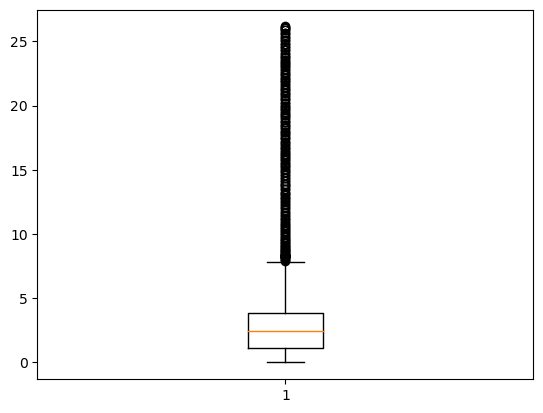

{'whiskers': [<matplotlib.lines.Line2D at 0x165b6018430>,
 'caps': [<matplotlib.lines.Line2D at 0x165b6018970>,
 'boxes': [<matplotlib.lines.Line2D at 0x165b6018190>],
 'medians': [<matplotlib.lines.Line2D at 0x165b6018eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x165b6026190>],
 'means': []}

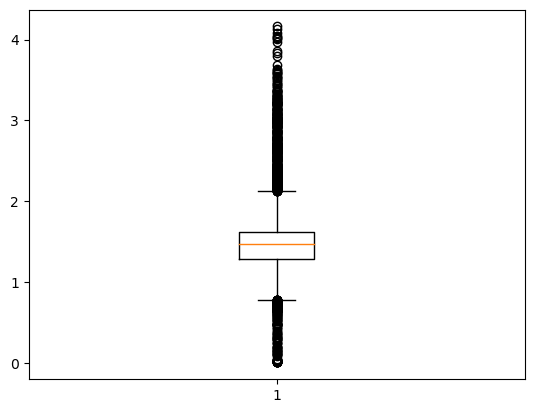

In [10]:
plt.boxplot(pedDf['displacementY'])
plt.show()
plt.boxplot(pedDf['speed'])

In [11]:
# outliers = cleaner.getOutliersBySpeed(pedDf, byIQR=True, returnVals=True)
# outliers.index

In [12]:
# outliers = cleaner.getOutliersBySpeed(pedDf, byIQR=False, returnVals=True)
# outliers

In [13]:
# outliers = cleaner.getOutliersByYDisplacement(pedDf, byIQR=False, returnVals=True)
# outliers

In [14]:
# print(len(outliers), 'vs', len(pedDf["uniqueTrackId"].unique()))

In [15]:
# outliers = cleaner.getOutliersByXDisplacement(pedDf, byIQR=False, returnVals=True)
# outliers

IQR value for column speed is: 0.30762951679176154
using range (1.0230386981730728, 2.253556765340119)
using range (0.0, 3.5)


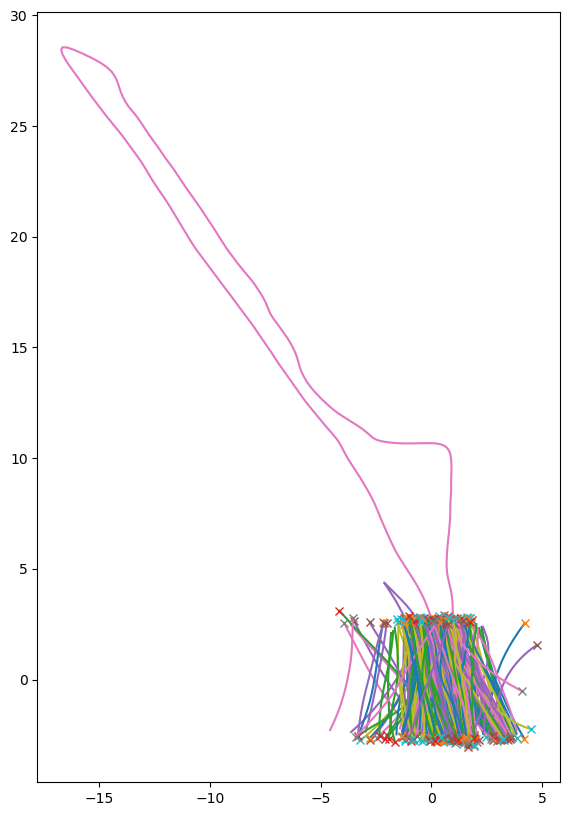

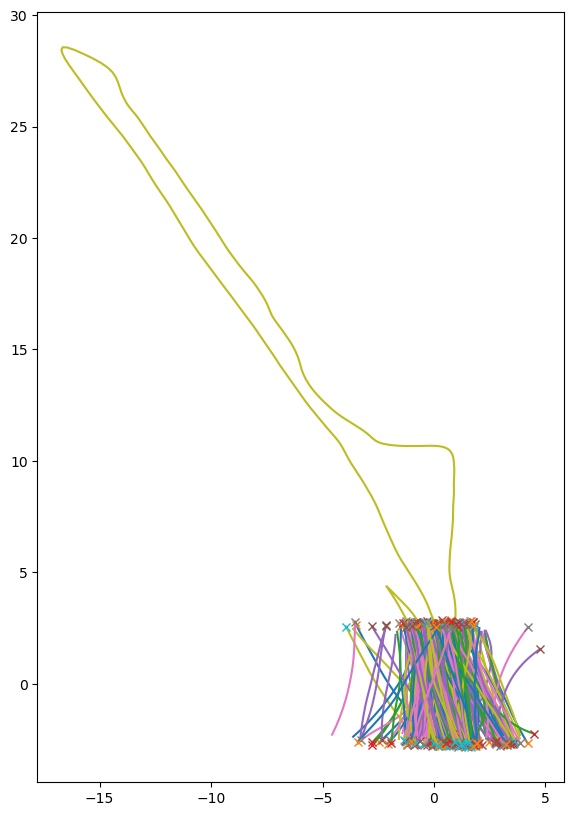

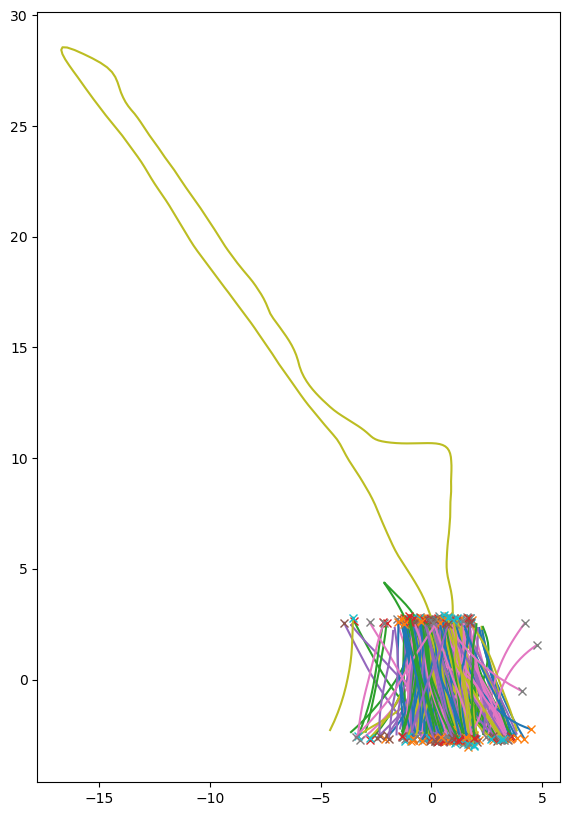

In [16]:
cleanPedDf = cleaner.cleanBySpeed(pedDf, byIQR=True)
cleanPedDf2 = cleaner.cleanBySpeed(pedDf, byIQR=False)
visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
visualizer.show(cleanPedDf2, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')

using min Y displacement (5)


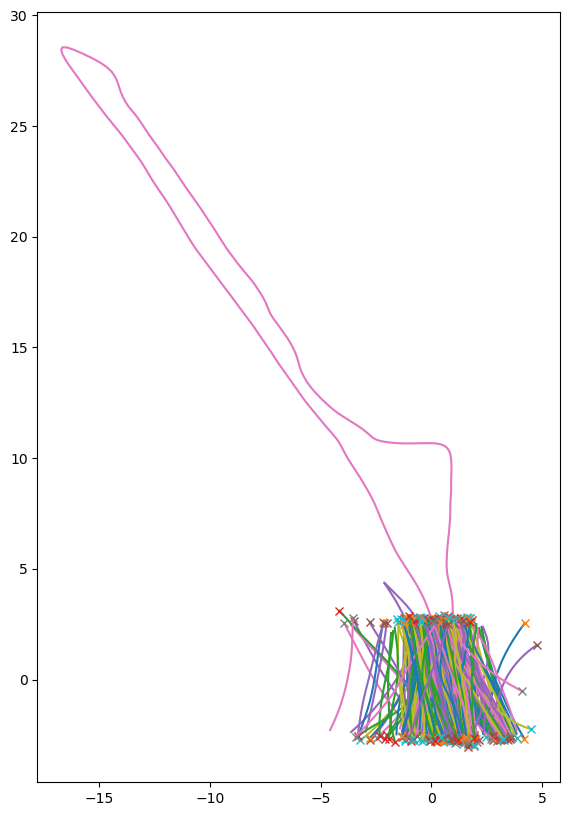

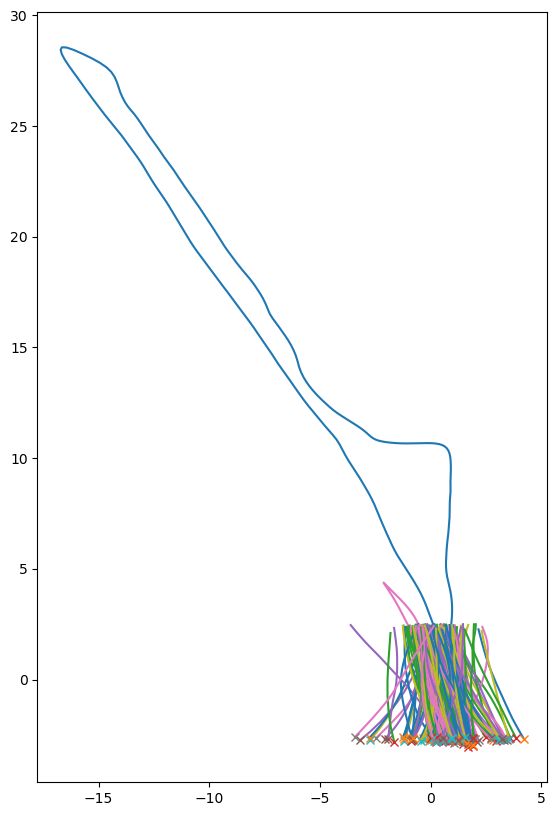

In [17]:
cleanPedDf = cleaner.cleanByYDisplacement(pedDf, byIQR=False)
visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')

In [18]:
allPedIds = list(cleanPedDf["uniqueTrackId"].unique())

In [19]:
transformer.translateAllToLocalSource(cleanPedDf)

In [20]:
cleanPedDf.head()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY,localX,localY
0,18,751,18023,10,5.0,0.633506,2.406819,-0.124725,1.197404,-0.200707,-0.049552,1.203882,0.000000,0.000000,0.000000,0.000000
1,18,756,18023,10,5.0,0.653314,2.163065,-0.099043,1.218770,-0.128407,-0.106831,1.222788,0.019809,0.243754,0.019809,-0.243754
2,18,761,18023,10,5.0,0.674600,1.919279,-0.106426,1.218930,0.036911,-0.000799,1.223567,0.041094,0.487540,0.041094,-0.487540
3,18,766,18023,10,5.0,0.701232,1.674626,-0.133163,1.223264,0.133686,-0.021670,1.230490,0.067726,0.732193,0.067726,-0.732193
4,18,771,18023,10,5.0,0.728331,1.426538,-0.135494,1.240441,0.011656,-0.085887,1.247819,0.094825,0.980281,0.094825,-0.980281


In [21]:
# trackDf = cleanPedDf[cleanPedDf["uniqueTrackId"]==allPedIds[0]]
# visualizer.show(trackDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')
# transformer.rotate(trackDf)
# visualizer.show(trackDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

In [22]:
tracksMeta.head()

,uniqueTrackId,initialFrame,finalFrame,numFrames,class,horizontalDirection,verticalDirection
0,18023,751,861,23,pedestrian,EAST,SOUTH
1,18042,1638,1768,27,pedestrian,WEST,NORTH
2,18053,2696,2816,25,pedestrian,EAST,SOUTH
3,18069,4180,4265,18,pedestrian,EAST,SOUTH
4,18090,5369,5434,14,pedestrian,EAST,SOUTH


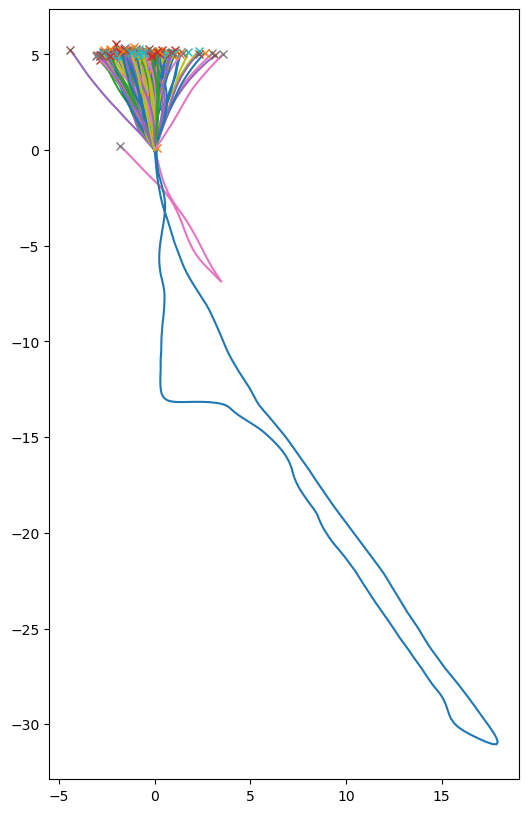

In [23]:
southIds = []
for pedId in allPedIds:
    trackDf = cleanPedDf[cleanPedDf["uniqueTrackId"] == pedId]
    trackMeta = tracksMeta[tracksMeta["uniqueTrackId"] == pedId].iloc[0]
    # print(trackMeta['verticalDirection'])
    if trackMeta['verticalDirection'] == "SOUTH":
        southIds.append(pedId)
        # print(trackMeta["uniqueTrackId"])
        X, Y = transformer.rotate(trackDf)
        cleanPedDf.loc[cleanPedDf["uniqueTrackId"] == pedId, 'localX'] = X
        cleanPedDf.loc[cleanPedDf["uniqueTrackId"] == pedId, 'localY'] = Y

visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

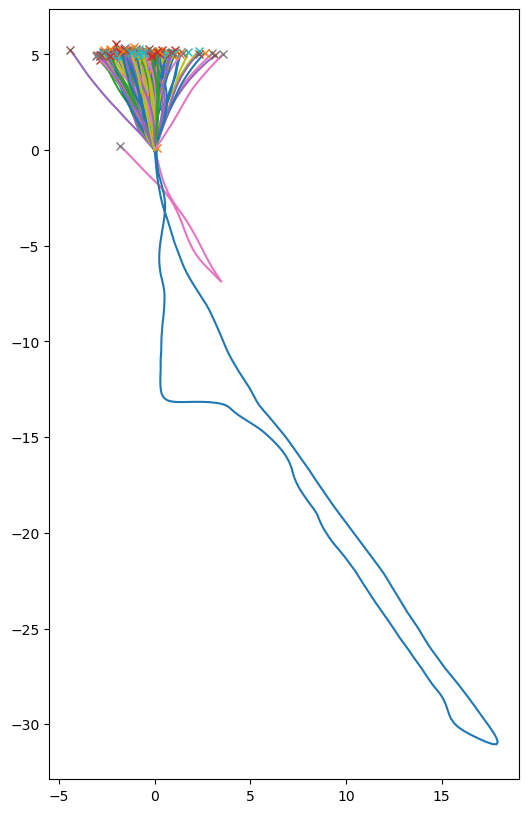

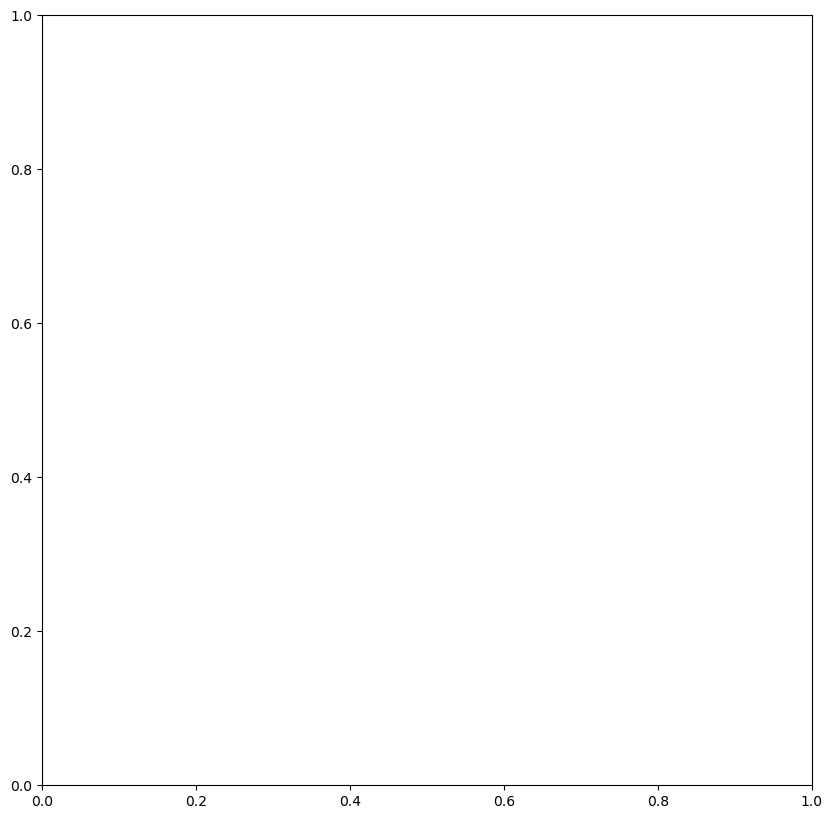

In [25]:
southPeds = cleanPedDf[cleanPedDf["uniqueTrackId"].isin(southIds)]
visualizer.show(southPeds, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')
northPeds = cleanPedDf[~cleanPedDf["uniqueTrackId"].isin(southIds)]
visualizer.show(northPeds, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

In [30]:
cleanPedDf[cleanPedDf["uniqueTrackId"] == southIds[0]].head(10)

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY,localX,localY
0,18,751,18023,10,5.0,0.633506,2.406819,-0.124725,1.197404,-0.200707,-0.049552,1.203882,0.000000,0.000000,-0.000000,-0.000000
1,18,756,18023,10,5.0,0.653314,2.163065,-0.099043,1.218770,-0.128407,-0.106831,1.222788,0.019809,0.243754,-0.019809,0.243754
2,18,761,18023,10,5.0,0.674600,1.919279,-0.106426,1.218930,0.036911,-0.000799,1.223567,0.041094,0.487540,-0.041094,0.487540
3,18,766,18023,10,5.0,0.701232,1.674626,-0.133163,1.223264,0.133686,-0.021670,1.230490,0.067726,0.732193,-0.067726,0.732193
4,18,771,18023,10,5.0,0.728331,1.426538,-0.135494,1.240441,0.011656,-0.085887,1.247819,0.094825,0.980281,-0.094825,0.980281
5,18,776,18023,10,5.0,0.739176,1.182487,-0.054223,1.220254,-0.406354,0.100933,1.221459,0.105670,1.224332,-0.105670,1.224332
6,18,781,18023,10,5.0,0.744530,0.944285,-0.026771,1.191010,-0.137259,0.146222,1.191311,0.111024,1.462534,-0.111024,1.462534
7,18,786,18023,10,5.0,0.754480,0.704007,-0.049750,1.201387,0.114894,-0.051887,1.202417,0.120974,1.702811,-0.120974,1.702811
8,18,791,18023,10,5.0,0.775475,0.464806,-0.104975,1.196009,0.276125,0.026894,1.200607,0.141969,1.942013,-0.141969,1.942013
9,18,796,18023,10,5.0,0.809557,0.225001,-0.170411,1.199021,0.327178,-0.015062,1.211070,0.176051,2.181817,-0.176051,2.181817


In [29]:
startingDf = cleanPedDf[cleanPedDf["displacementY"] < 1]

In [31]:
startingDf.head(10)

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY,localX,localY
0,18,751,18023,10,5.0,0.633506,2.406819,-0.124725,1.197404,-0.200707,-0.049552,1.203882,0.000000,0.000000,-0.000000,-0.000000
1,18,756,18023,10,5.0,0.653314,2.163065,-0.099043,1.218770,-0.128407,-0.106831,1.222788,0.019809,0.243754,-0.019809,0.243754
2,18,761,18023,10,5.0,0.674600,1.919279,-0.106426,1.218930,0.036911,-0.000799,1.223567,0.041094,0.487540,-0.041094,0.487540
3,18,766,18023,10,5.0,0.701232,1.674626,-0.133163,1.223264,0.133686,-0.021670,1.230490,0.067726,0.732193,-0.067726,0.732193
4,18,771,18023,10,5.0,0.728331,1.426538,-0.135494,1.240441,0.011656,-0.085887,1.247819,0.094825,0.980281,-0.094825,0.980281
50,18,2696,18053,10,5.0,0.857354,2.336601,0.045148,1.059391,1.010939,-0.402157,1.060352,0.223848,0.070218,-0.000000,-0.000000
51,18,2701,18053,10,5.0,0.885137,2.110236,-0.138919,1.131822,0.920336,-0.362158,1.140316,0.251632,0.296582,-0.027784,0.226364
52,18,2706,18053,10,5.0,0.925876,1.857610,-0.203694,1.263128,0.323873,-0.656531,1.279447,0.292370,0.549208,-0.068523,0.478990
53,18,2711,18053,10,5.0,0.949118,1.586989,-0.116209,1.353108,-0.437424,-0.449896,1.358089,0.315612,0.819830,-0.091764,0.749612
75,18,4180,18069,10,5.0,0.535340,2.368113,-0.457393,1.472568,0.234670,-0.294592,1.541968,0.098166,0.038705,-0.000000,-0.000000


In [39]:
startingDf[["uniqueTrackId", "frame"]].groupby(["uniqueTrackId"]).count()

,frame
uniqueTrackId,
18023,5
18053,4
18069,4
18090,2
18127,5
...,...
29439,2
29446,5
29498,3


In [36]:
startingDf[["uniqueTrackId", "frame"]]

,uniqueTrackId,frame
0,18023,751
1,18023,756
2,18023,761
3,18023,766
4,18023,771
...,...,...
11413,29530,27942
11494,29534,28031
11495,29534,28036
11496,29534,28041
